In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Generem un dataframe amb els noms dels fitxers a obrir

In [6]:
df = pd.DataFrame({'titol': ['Tarragona', 'La Pineda 1', 'La Pineda 2', 'La Pineda 3', 'La Pineda 4', 'La Pineda 5', 'La Pineda 6', 'La Pineda 7', 'La Pineda 8'] ,'nomfitxer':['11803_11528_1712_ALL_20230101084937_20230228084937.csv', '11804_11529_711015017_ALL_20230101085050_20230228085050.csv', '11804_11530_1711100004_ALL_20230101085101_20230228085101.csv', '11804_11531_711018015_ALL_20230101085113_20230228085113.csv', '11805_11532_1711033276_ALL_20230101085235_20230228085235.csv', '11805_11533_1711100019_ALL_20230101085242_20230228085242.csv', '11805_11534_2099133_ALL_20230101085251_20230228085251.csv', '11806_11535_711029014_ALL_20230101085409_20230228085409.csv', '11806_11536_1711100017_ALL_20230101085414_20230228085414.csv']})

Obrim els fitxers csv inclosos en 'nomfitxer' i els guardem en un diccionari 'df_dict', la clau del diccionari es el numero d'iteració. 

In [7]:
df_dict = dict()
for itera in range(len(df)):
    nomfitxer = df['nomfitxer'][itera]
    df_punt = pd.read_csv(nomfitxer, na_values='-9999.9' ,header=1, delimiter="\t")
    df_punt['Fecha (GMT)'] = pd.to_datetime(df_punt['Fecha (GMT)'])
    df_punt.set_index("Fecha (GMT)")
    df_dict[itera] = df_punt

Obrim ara el fitxer de Vladimir per poder comparar la correlació entre el seu registre i la col·lecció de boies, especialment la boia real.
Corregim el nom de les columnes per evitar espais en blanc i el timestamp per igualar-lo a la resta de dataframes. 

In [8]:
r_vlad = pd.read_csv('combined_boye_stat.csv', header=0, delimiter=",")
r_vlad.columns = r_vlad.columns.str.strip()
r_vlad['Timestamp'] =pd.to_datetime(r_vlad['Timestamp'], format="%Y%m%d%H%M%S").dt.strftime('%d-%m-%y %H')+'h'



Comparem la data en el registre de Vladimir amb les de la boia de Tarragona i l'afegim a la resposta, així tenim l'alçades significativa de la boia en el moment que la càmera obté la mitjana, arreglem la columna de dates i la fem servir d'index i reanomenem les columnes:

In [9]:
r_vlad = pd.read_csv('combined_boye_stat.csv', header=0, delimiter=",")
r_vlad.columns = r_vlad.columns.str.strip()

# Convertir 'Fecha (GMT)' de df_dict[0] a datetime si aún no lo está
df_dict[0]['Fecha (GMT)'] = pd.to_datetime(df_dict[0]['Fecha (GMT)'])

# Convertir 'Timestamp' de r_vlad a datetime si aún no lo está
r_vlad['Timestamp'] = pd.to_datetime(r_vlad['Timestamp'], format='%Y%m%d%H%M%S')

# Redondear a la hora más cercana, si es necesario
df_dict[0]['Fecha (GMT)'] = df_dict[0]['Fecha (GMT)'].dt.round('H')
r_vlad['Timestamp'] = r_vlad['Timestamp'].dt.round('H')

r_vlad['Timestamp'] = pd.to_datetime(r_vlad['Timestamp'])
#r_vlad['Timestamp'] = pd.to_datetime(r_vlad['Timestamp'], format="%Y%m%d%H%M%S").dt.strftime('%d-%m-%y %H')+'h'

# Filtrar df_dict[0] para obtener solo las filas donde 'Fecha (GMT)' está en r_vlad['Timestamp']
filter2_df = df_dict[0][df_dict[0]['Fecha (GMT)'].isin(r_vlad['Timestamp'])]

# Realizar un merge (combinación) entre r_vlad y filter_df basándote en la coincidencia de las fechas
vlad_df = pd.merge(
    left=r_vlad,
    right=filter2_df[['Fecha (GMT)', 'Altura Signif. del Oleaje(m)']],
    left_on='Timestamp',
    right_on='Fecha (GMT)'
)

# Seleccionar las columnas específicas que quieres mantener en vlad_df
vlad_df = vlad_df[['Timestamp', 'Average H', 'Altura Signif. del Oleaje(m)']]


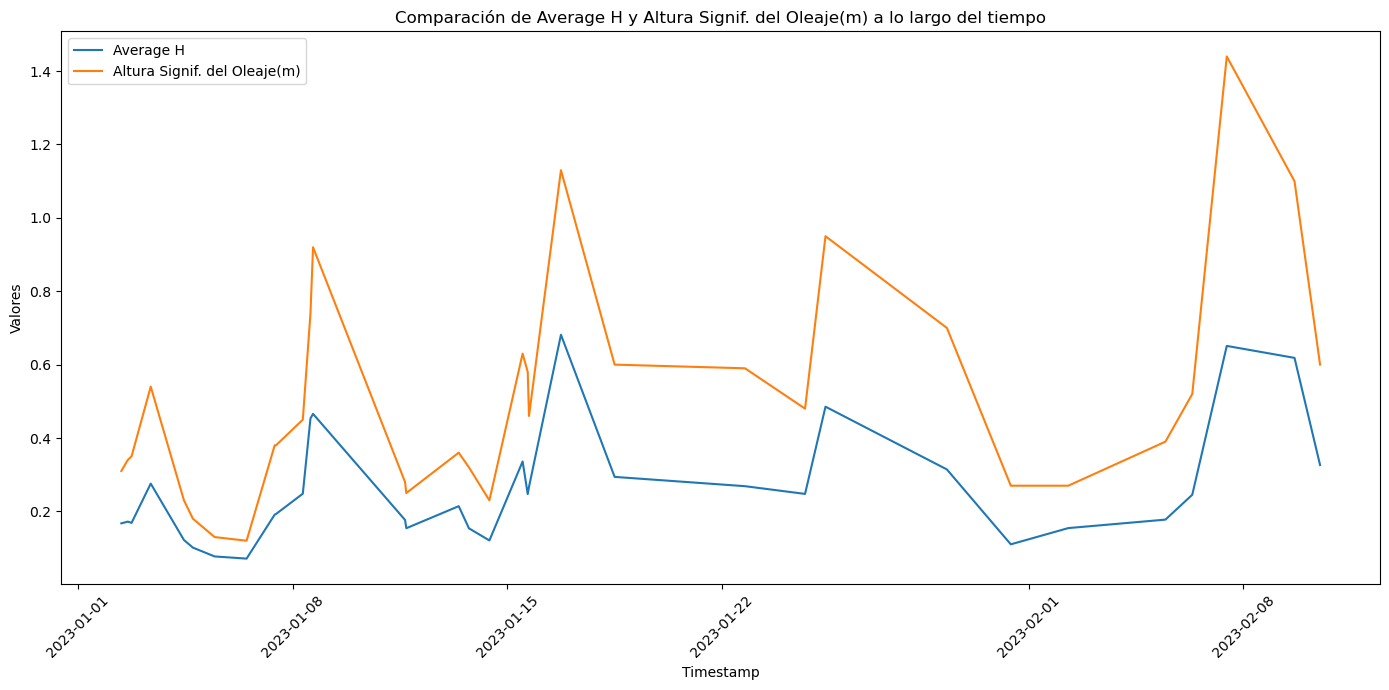

In [10]:

# Iniciar un gráfico de matplotlib
plt.figure(figsize=(14, 7))

# Graficar la segunda columna 'Average H'
sns.lineplot(x='Timestamp', y='Average H', data=vlad_df, label='Average H')

# Graficar la tercera columna 'Altura Signif. del Oleaje(m)'
sns.lineplot(x='Timestamp', y='Altura Signif. del Oleaje(m)', data=vlad_df, label='Altura Signif. del Oleaje(m)')

# Personalización del gráfico
plt.title('Comparación de Average H y Altura Signif. del Oleaje(m) a lo largo del tiempo')
plt.xlabel('Timestamp')
plt.ylabel('Valores')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend()  # Mostrar la leyenda
plt.tight_layout()  # Ajustar automáticamente los parámetros de la figura para dar espacio a las etiquetas

# Mostrar el gráfico
plt.show()